# Bespoke Data Preprocessing:
*Remeber to also preprocess test data.*

## Import and Setup:

In [1]:
import os

project_name = "eyft"

while not os.path.abspath(os.curdir).endswith(project_name):
    os.chdir('..')

print(os.path.abspath(os.curdir))

C:\Users\MD726YR\PycharmProjects\eyft


In [2]:
# Import libraries
import re
import pandas as pd

from kedro.io import DataCatalog
from kedro.extras.datasets.pandas import (
    ExcelDataSet,
    CSVDataSet
)

from src.eyft.utils.processing import explore

In [3]:
# Setup
pd.set_option('display.max_columns', None)

In [4]:
# Constants
input_data_dir = "./data/01_raw/train"
processed_dir = "./data/02_data_processing"
data_fname = "ds_flanders.xlsx"

## Explore and Process:

In [5]:
train_key = "train_inputs"
save_key = "preprocessed_inputs"

io = DataCatalog(
    {
        train_key: ExcelDataSet(
            filepath=os.path.join(input_data_dir, data_fname)
        ),
        save_key: ExcelDataSet(
            filepath=os.path.join(processed_dir, data_fname)
        )
    }
)

df = io.load(train_key)

In [6]:
display(df)

,Selected,CD_REFNIS,Postcode,ID,Right_Postcode,Gemeente,Prijs,Slaapkamers,Bewoonbare_oppervlakte,Concat_information,Provincie,Provinciecodering,Gewest,EPC,Energieklasse,Prijs_per_m2,Bouwjaar,Kadastraal_inkomen,Staat_gebouw,Terrein,Gevels,Tuin,Verwarmingstype,DateTime_Out,Laatste_datum,Time_between_scrapes,Update_Prijs_per_vierkante_m,Quarter,Year,Asset_type,GEO_locatie,prijs_update,straat,badkamer,Verdieping,Overdekte_parking,Time_between_2_scrapes
0,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,325000,3,135,"Sale price â¬ 325,000\n325000 â¬ , ...",Antwerpen,4,Vlaanderen,259.0,C,2407.407407,0,0.0,As new,NaN,NaN,NaN,NaN,2020-02-06,2020-02-06,NaN,NaN,1,2020,Flats,Aartselaar,NaN,Hendrik De Braekeleerlaan 68,1.0,2.0,1.0,0.0
1,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,174000,2,90,"Sale price â¬ 174,000\n174000 â¬ ,C...",Antwerpen,4,Vlaanderen,644.0,F,1933.333333,1967,733.0,NaN,NaN,NaN,NaN,Gas,2020-02-06,2020-02-06,NaN,NaN,1,2020,Flats,Aartselaar,NaN,Antwerpsesteenweg 50,1.0,3.0,1.0,0.0
2,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,174000,2,90,"Flood zone type Non flood zone , E-l...",Antwerpen,4,Vlaanderen,644.0,F,1933.333333,1967,0.0,NaN,NaN,NaN,NaN,Gas,2020-03-12,2020-05-06,NaN,NaN,1,2020,Flats,Aartselaar,174000.0,Antwerpsesteenweg 5,1.0,3.0,1.0,55.0
3,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,199000,2,91,"Flood zone type Non flood zone , E-l...",Antwerpen,4,Vlaanderen,206.0,C,2186.813187,0,0.0,As new,NaN,NaN,NaN,Gas,2020-03-12,2020-03-12,NaN,2186.813187,1,2020,Flats,Aartselaar,199000.0,Hoevelei 194,NaN,1.0,NaN,0.0
4,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,239000,2,95,"Price â¬ 239,000\n239000 â¬ ,Cadast...",Antwerpen,4,Vlaanderen,229.0,C,2515.789474,1979,862.0,Just renovated,NaN,NaN,NaN,Gas,2020-03-30,2020-05-13,NaN,NaN,1,2020,Flats,Aartselaar,239000.0,Leon Gilliotlaan 40,1.0,2.0,1.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36059,1,73107,3630,https://www.immoweb.be/nl/zoekertje/villa/te-k...,3630,Eisden,895000,6,735,Stedenbouwkundige vergunning ontvangen Ja ...,Limburg,3,Vlaanderen,182.0,B,1217.687075,1930,0.0,Uitstekende staat,3650.0,4.0,0.0,NaN,2020-04-27,2020-04-27,0.0,NaN,2,2020,Houses,Maasmechelen,895000.0,Rijksweg 129,2.0,NaN,NaN,NaN
36060,1,73107,3631,https://www.immoweb.be/en/classified/apartment...,3631,Boorsem,259000,4,120,"Planning permission obtained Yes ,Flood...",Limburg,3,Vlaanderen,51.0,A,2158.333333,2015,0.0,As new,NaN,NaN,NaN,Gas,2020-12-23,2020-12-30,NaN,NaN,4,2020,Flats,Maasmechelen,259000.0,Grotestraat 325/1,1.0,NaN,NaN,7.0
36061,1,73107,3631,https://www.immoweb.be/nl/zoekertje/huis/te-ko...,3631,Boorsem,265000,3,130,Primair energieverbruik 487 kWh/mÂ²\nkilowattu...,Limburg,3,Vlaanderen,487.0,E,2038.461538,1965,0.0,Goed,386.0,4.0,0.0,NaN,2020-12-25,2020-12-25,0.0,NaN,4,2020,Houses,Maasmechelen,265000.0,Grotestraat 195,NaN,NaN,NaN,NaN
36062,1,73109,3793,https://www.immoweb.be/nl/zoekertje/huis/te-ko...,3793,Teuven,219000,4,110,"Prijs 219.000 â¬\n219000 â¬ , Type...",Limburg,3,Vlaanderen,665.0,F,1990.909091,0,0.0,Goed,350.0,4.0,0.0,NaN,2020-02-28,2020-02-28,0.0,NaN,1,2020,Houses,Voeren,219000.0,rue Varn 5,1.0,NaN,NaN,NaN


In [7]:
# Quickly translate columns to english to gain more understanding:
dutch_col2eng_col = {
    "Gemeente": "Municipality",
    "Prijs": "Price",
    "Slaapkamers": "Bedrooms",
    "Bewoonbare_oppervlakte": "Living Area",
    "Provincie": "Province",
    "Provinciecodering": "Province Code",
    "Gewest": "Region",
    "Energieklasse": "Energy Class",
    "Prijs_per_m2": "Price Per m2",
    "Bouwjaar": "Construction Year",
    "Kadastraal_inkomen": "Cadastral Income",
    "Staat_gebouw": "Type of Building",
    "Gevels": "Facades",
    "Tuin": "Garden",
    "Verwarmingstype": "Heating Type",
    "Laatste_datum": "Last Date",
    "Update_Prijs_per_vierkante_m": "Updated Price Per m2",
    "GEO_locatie": "GEO Location",
    "prijs_update": "Updated Price",
    "straat": "Street",
    "badkamer": "Bathroom",
    "Verdieping": "Floor",
    "Overdekte_parking": "Covered Parking",
}
df.rename(columns=dutch_col2eng_col, inplace=True)

In [8]:
x_cols = ["Price", "Bedrooms", "Facades"]
y_col = "EPC"

------------------------------
Analysing X: Price | Y: EPC
count    3.606400e+04
mean     4.216981e+05
std      4.234975e+05
min      1.200000e+04
25%      2.290000e+05
50%      2.990000e+05
75%      4.450000e+05
max      9.500000e+06
Name: Price, dtype: float64


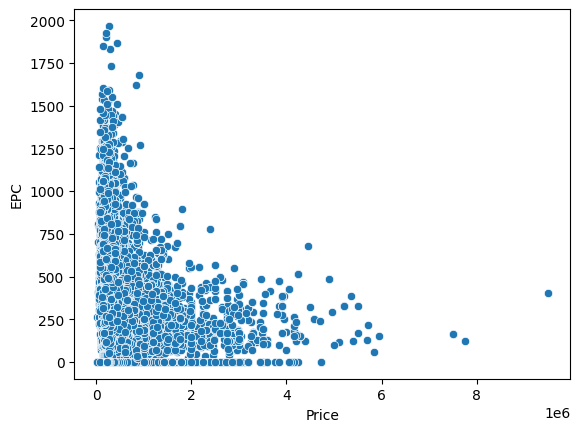

------------------------------
Analysing X: Bedrooms | Y: EPC
count    36064.000000
mean         2.737467
std          1.365374
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         99.000000
Name: Bedrooms, dtype: float64


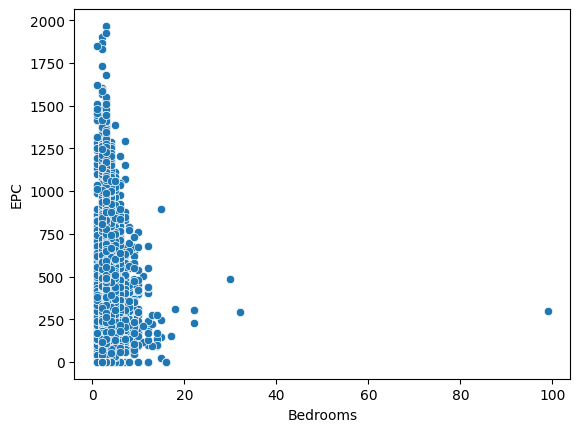

------------------------------
Analysing X: Facades | Y: EPC
count    11780.000000
mean         2.977929
std          0.877130
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Facades, dtype: float64


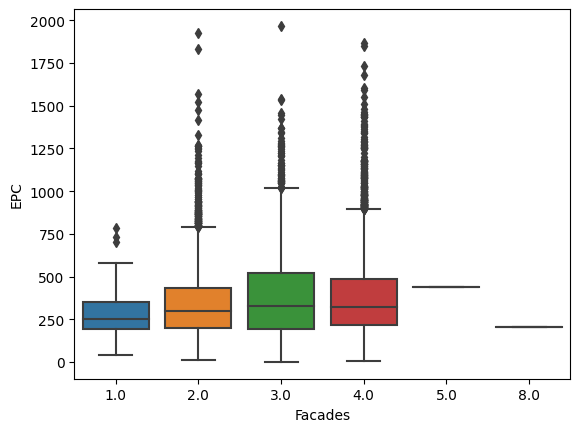

In [9]:
for col in x_cols:
    explore(
        df, x_col=col, y_col=y_col
    )

## Save Processed Data:

In [10]:
io.save(save_key, df[[*x_cols, y_col]])